In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from scipy import stats

In [2]:
url='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv'


In [3]:
def downloud(url,filename):
    response = requests.get(url)
    if response.status_code == 200:
        with open(filename,"wb") as file:
            file.write(response.content)

In [4]:
downloud(url,"car.csv")
file_name="car.csv"

In [5]:
file_name

'car.csv'

In [6]:
# read csv file.
df = pd.read_csv()
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [7]:
# to choose what is the right vizulaization you need to know the type of data which you dealing with.
df.dtypes

symboling              int64
normalized-losses      int64
make                  object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
city-L/100km         float64
horsepower-binned     object
diesel                 int64
gas                    int64
dtype: object

In [8]:
# what is the data type of peak-rom
df['peak-rpm'].dtypes

dtype('float64')

In [9]:
df.corr()

C:\Users\Mohamed Asharf\AppData\Local\Temp\ipykernel_33964\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008245,-0.182196,0.075819,0.279740,-0.035527,0.036233,-0.082391,0.066171,-0.196735,0.196735
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055563,-0.114713,0.217299,0.239543,-0.225016,-0.181877,0.133999,0.238567,-0.101546,0.101546
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158502,0.250313,0.371147,-0.360305,-0.470606,-0.543304,0.584642,0.476153,0.307237,-0.307237
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.124139,0.159733,0.579821,-0.285970,-0.665192,-0.698142,0.690628,0.657373,0.211187,-0.211187
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188829,0.189867,0.615077,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.244356,-0.244356
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.062704,0.259737,-0.087027,-0.309974,-0.049800,-0.104812,0.135486,0.003811,0.281578,-0.281578
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167562,0.156433,0.757976,-0.279361,-0.749543,-0.794889,0.834415,0.785353,0.221046,-0.221046
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.209523,0.028889,0.822676,-0.256733,-0.650546,-0.679571,0.872335,0.745059,0.070779,-0.070779
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566936,-0.267392,-0.582027,-0.591309,0.543155,0.554610,0.054458,-0.054458
stroke,-0.008245,0.055563,0.158502,0.124139,0.188829,-0.062704,0.167562,0.209523,-0.055390,1.000000,0.187923,0.098462,-0.065713,-0.034696,-0.035201,0.082310,0.037300,0.241303,-0.241303


In [10]:
df[['bore','stroke','compression-ratio','horsepower']].corr()

,bore,stroke,compression-ratio,horsepower
bore,1.000000,-0.055390,0.001263,0.566936
stroke,-0.055390,1.000000,0.187923,0.098462
compression-ratio,0.001263,0.187923,1.000000,-0.214514
horsepower,0.566936,0.098462,-0.214514,1.000000


(0.0, 53280.25194459451)

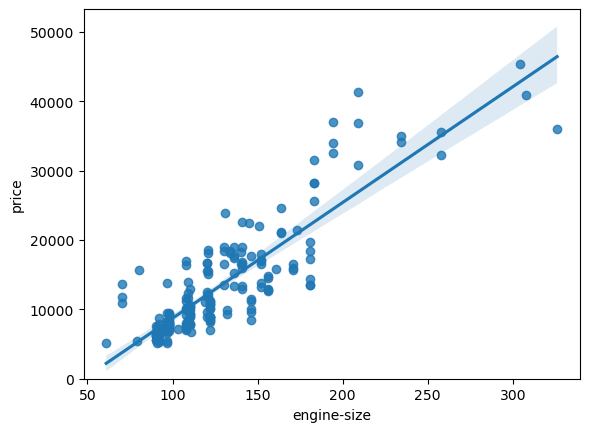

In [11]:
# lets see the scatterplot of engine-size and price .
sns.regplot(x='engine-size',y='price',data=df)
# to set the lower y-axis to start from 0 and x-axis unspacified.
plt.ylim(0,)

In [12]:
# to see examine the correlation between the engine-size and price.
df[['engine-size','price']].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


<Axes: xlabel='highway-mpg', ylabel='price'>

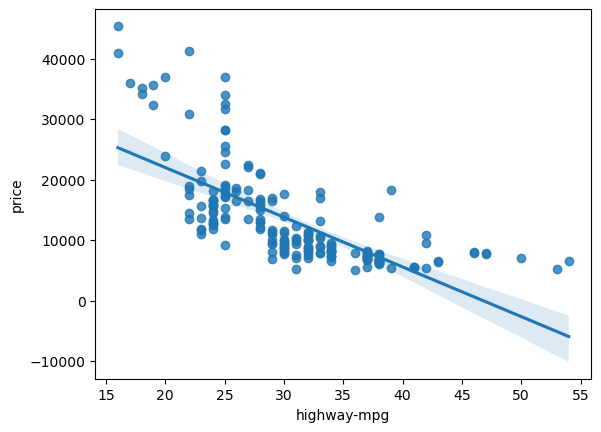

In [13]:
# create scatterplot for highway-mpg and price.
sns.regplot(x='highway-mpg',y='price',data=df)

In [14]:
# to examine cprrelation between highway-mpg and price
df[['highway-mpg','price']].corr()
# this is indicated to nigative relationship between this to type of data.

,highway-mpg,price
highway-mpg,1.000000,-0.704692
price,-0.704692,1.000000


<Axes: xlabel='peak-rpm', ylabel='price'>

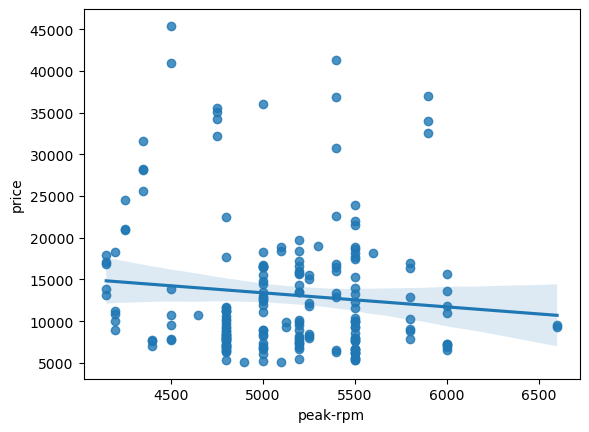

In [15]:
# to create viz between to columns to check the corelationship
sns.regplot(x="peak-rpm",y="price",data=df)

In [16]:
df[['peak-rpm','price']].corr()

,peak-rpm,price
peak-rpm,1.000000,-0.101616
price,-0.101616,1.000000


<Axes: xlabel='stroke', ylabel='price'>

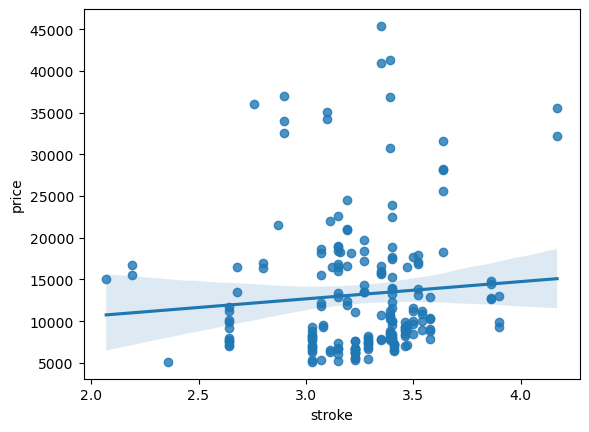

In [17]:
# find the repationship between stroke and pirce
sns.regplot(x='stroke',y='price',data=df)

In [18]:
# examine the corelation.
df[['stroke','price']].corr()
# too weak relationship between the data.

,stroke,price
stroke,1.00000,0.08231
price,0.08231,1.00000


<Axes: xlabel='body-style', ylabel='price'>

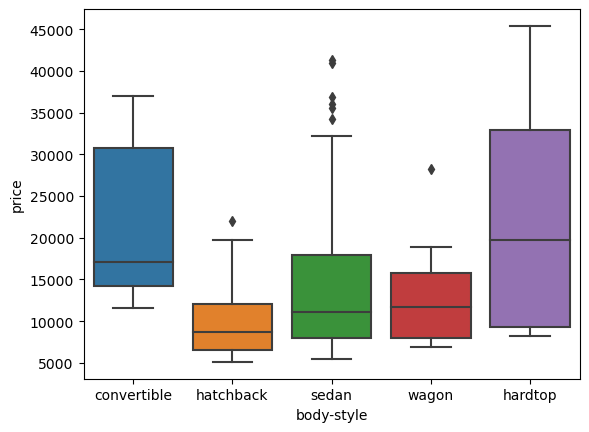

In [19]:
# to describe the relatoinsip between the boject and int we can use anther vis id "boxplot"
# body-style, price.
sns.boxplot(x="body-style",y="price",data=df)

<Axes: xlabel='engine-location', ylabel='price'>

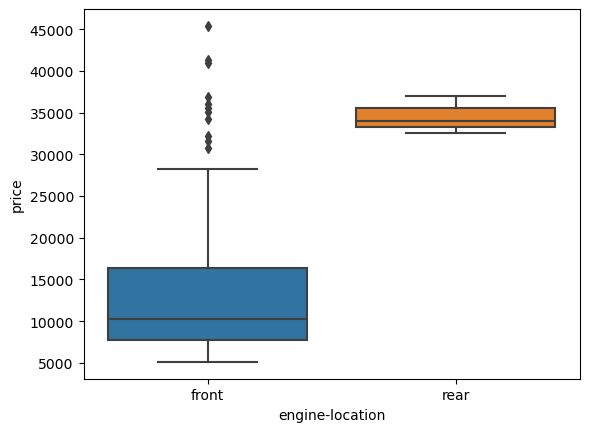

In [20]:
# exnmine the engine locationn with price. relationship.
sns.boxplot(x="engine-location",y="price",data=df)

In [21]:
rear_ingine = df[df['engine-location'] == 'rear'][['engine-location','horsepower','make']]      
rear_ingine # make > porsche is the max horsepower and engine location is rear.


,engine-location,horsepower,make
123,rear,207.0,porsche
124,rear,207.0,porsche
125,rear,207.0,porsche


In [22]:
df['engine-location'].value_counts()

front    198
rear       3
Name: engine-location, dtype: int64

In [23]:
# max horsepower in the car in this data
max_horse = df[df['horsepower'] == df['horsepower'].max()][['horsepower','make']]
max_horse

,horsepower,make
46,262.0,jaguar


<Axes: xlabel='drive-wheels', ylabel='price'>

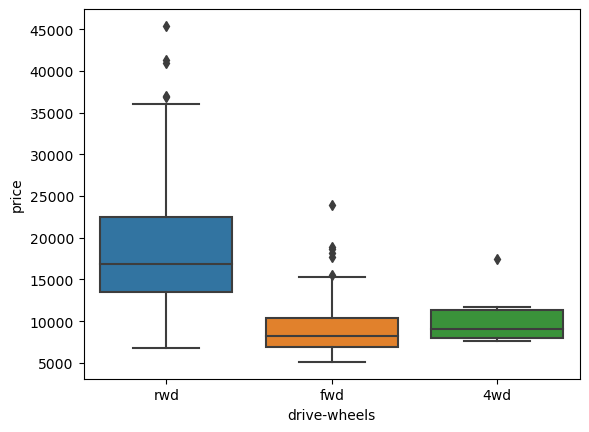

In [24]:
# the drive-wheels and price.
sns.boxplot(x="drive-wheels",y="price",data=df)

# discriptive statistical analysis

In [243]:
round(df.describe(),2)

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
count,201.00,201.0,201.00,201.00,201.00,201.00,201.00,201.00,201.00,201.00,201.00,201.00,201.00,201.00,201.00,201.00,201.00,201.0,201.0
mean,0.84,122.0,98.80,0.84,0.92,53.77,2555.67,126.88,3.33,3.26,10.16,103.41,5117.67,25.18,30.69,13207.13,9.94,0.1,0.9
std,1.25,32.0,6.07,0.06,0.03,2.45,517.30,41.55,0.27,0.32,4.00,37.37,478.11,6.42,6.82,7947.07,2.53,0.3,0.3
min,-2.00,65.0,86.60,0.68,0.84,47.80,1488.00,61.00,2.54,2.07,7.00,48.00,4150.00,13.00,16.00,5118.00,4.80,0.0,0.0
25%,0.00,101.0,94.50,0.80,0.89,52.00,2169.00,98.00,3.15,3.11,8.60,70.00,4800.00,19.00,25.00,7775.00,7.83,0.0,1.0
50%,1.00,122.0,97.00,0.83,0.91,54.10,2414.00,120.00,3.31,3.29,9.00,95.00,5125.37,24.00,30.00,10295.00,9.79,0.0,1.0
75%,2.00,137.0,102.40,0.88,0.92,55.50,2926.00,141.00,3.58,3.41,9.40,116.00,5500.00,30.00,34.00,16500.00,12.37,0.0,1.0
max,3.00,256.0,120.90,1.00,1.00,59.80,4066.00,326.00,3.94,4.17,23.00,262.00,6600.00,49.00,54.00,45400.00,18.08,1.0,1.0


In [28]:
df.describe(include="object")
#df.describe(include=["float64","int64"])

,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned
count,201,201,201,201,201,201,201,201,201,200
unique,22,2,2,5,3,2,6,7,8,3
top,toyota,std,four,sedan,fwd,front,ohc,four,mpfi,Low
freq,32,165,115,94,118,198,145,157,92,115


In [29]:
# value_counts() for "drive-wheels"
df["drive-wheels"].value_counts()

fwd    118
rwd     75
4wd      8
Name: drive-wheels, dtype: int64

In [30]:
# to onvert the value in frame we can put .to_frame
drive_wheels_counts = df["drive-wheels"].value_counts().to_frame()
drive_wheels_counts

,drive-wheels
fwd,118
rwd,75
4wd,8


In [31]:
# rename the columns name in the dataframe.
drive_wheels_counts.rename(columns={"drive-wheels":"value_counts"},inplace=True)
drive_wheels_counts

,value_counts
fwd,118
rwd,75
4wd,8


In [32]:
# lto rename the index to drive wheels
drive_wheels_counts.index.name = "drive-wheels"
drive_wheels_counts

,value_counts
drive-wheels,
fwd,118
rwd,75
4wd,8


In [33]:
# count the engine-location in datafrome  and then rename the column of it and rename the index name.
engine_location_counts = df['engine-location'].value_counts().to_frame()
engine_location_counts.rename(columns={'engine-location':'count_value'},inplace=True)
engine_location_counts.index.name = 'engine_location'
engine_location_counts

,count_value
engine_location,
front,198
rear,3


In [34]:
df['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [35]:
# to know which the valuable drive-wheels and then average then.
df_group_one = df[['drive-wheels','body-style','price']]
#grouping the result 
df_group_one =df_group_one.groupby(['drive-wheels'],as_index=False).mean() 
df_group_one

C:\Users\Mohamed Asharf\AppData\Local\Temp\ipykernel_33964\4243827037.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_group_one =df_group_one.groupby(['drive-wheels'],as_index=False).mean()


,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


In [36]:
df_gotest = df[['drive-wheels','body-style','price']]
# create groupby for mean of price (mean of price for body-style and drive-wheels)
group_test1 = df_gotest.groupby(['drive-wheels','body-style'],as_index= False).mean()
group_test1

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


In [37]:
# after craete groupby to can craete pivot table
grouped_pivot = group_test1.pivot(index='drive-wheels',columns='body-style')
round(grouped_pivot,2)

price                                        
body-style   convertible   hardtop hatchback     sedan     wagon
drive-wheels                                                    
4wd                  NaN       NaN   7603.00  12647.33   9095.75
fwd              11595.0   8249.00   8396.39   9811.80   9997.33
rwd              23949.6  24202.71  14337.78  21711.83  16994.22

In [38]:
# we need to fill the missing data with 0 value.
grouped_pivot = round(grouped_pivot.fillna(0))
grouped_pivot

price                                     
body-style   convertible  hardtop hatchback    sedan    wagon
drive-wheels                                                 
4wd                  0.0      0.0    7603.0  12647.0   9096.0
fwd              11595.0   8249.0    8396.0   9812.0   9997.0
rwd              23950.0  24203.0   14338.0  21712.0  16994.0

In [39]:
# find the average price of each car beased on "body-style".
gpbody = df[['body-style','price']]
group_by_body = gpbody.groupby(['body-style'],as_index=False).mean()
group_by_body

,body-style,price
0,convertible,21890.500000
1,hardtop,22208.500000
2,hatchback,9957.441176
3,sedan,14459.755319
4,wagon,12371.960000


using the viz heat map. 

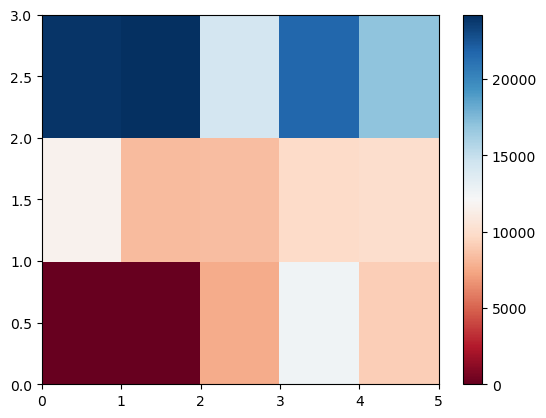

In [40]:
plt.pcolor(grouped_pivot,cmap='RdBu')
plt.colorbar()
plt.show()
# this is good but not help to explain this data need to add more information 

NameError: name 'im' is not defined

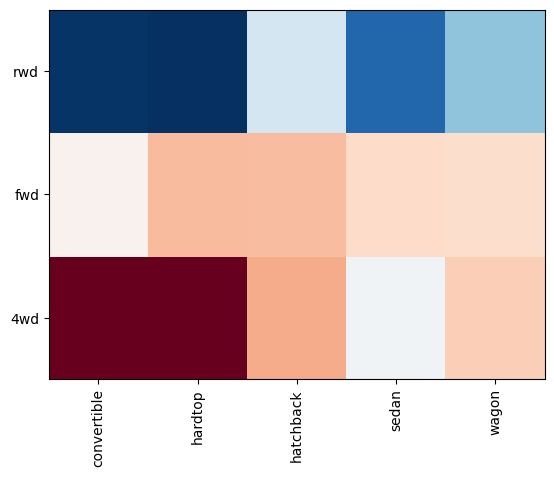

In [41]:
fig,ax = plt.subplots()
mi = ax.pcolor(grouped_pivot,cmap='RdBu')

# label names.
row_labels = grouped_pivot.columns.levels[1]
column_labels = grouped_pivot.index

#move ticks and labels to the center.
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5,minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5,minor=False)

#insert labels.
ax.set_xticklabels(row_labels,minor=False)
ax.set_yticklabels(column_labels,minor=False)

#rotate label if too long.
plt.xticks(rotation=90)
fig.colorbar(im)
plt.show()

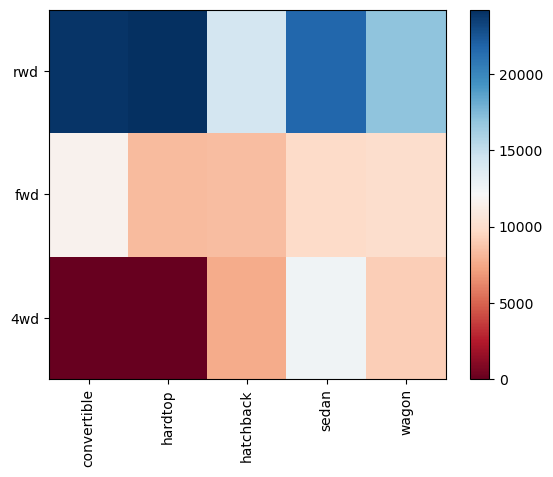

In [180]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + .5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + .5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

In [42]:
# there is another way to calculate the correlation between two variable. is P-value .
# the siginificant level of 0.05 is .95  this high level of evidence.
# we can accsipt the evidence till 10% this is mean 90% confident correlation.
# < .1 $ is weak evidence correlation.
# > .1 $ is no evidence between then.
##-----------------------------------------------------------------
# we can use this function using laylirary .
from scipy import stats

In [43]:
pearson_coef,P_value = stats.pearsonr(df['wheel-base'],df['price'])
print(f"pearson_coef : {pearson_coef} P_value : {P_value}")

pearson_coef : 0.5846418222655083 P_value : 8.076488270732552e-20


In [47]:
# calculate  the correlation coefficient and p-value.
pearson_coef,P_value = stats.pearsonr(df['horsepower'],df['price'])
print(f"the pearson correlation coefficient {pearson_coef}, With p-Value :{P_value}")

the pearson correlation coefficient 0.8095745670036555, With p-Value :6.369057428260919e-48


In [315]:
# calculate  the correlation coefficient and p-value 'length'.
pearson_coef,P_value = stats.pearsonr(df['symboling'],df['price'])
print(f" the pearson correlation coefficient = {pearson_coef} with P-value {P_value} ")

 the pearson correlation coefficient = -0.08239118716962354 with P-value 0.244914876571648 


In [341]:
# this funcation to check the type of data and if there is any inf or missing data in all columns to fix the pervios error.
def conv_1(dataset):
    for column in dataset.columns.tolist():
        inf_data = np.isinf(pd.to_numeric(dataset[column], errors='coerce'))
        #inf_data_1 = dataset[column].str.contains('inf')
        print(inf_data.value_counts())
    return
conv_1(df)

False    201
Name: symboling, dtype: int64
False    201
Name: normalized-losses, dtype: int64
False    201
Name: make, dtype: int64
False    201
Name: aspiration, dtype: int64
False    201
Name: num-of-doors, dtype: int64
False    201
Name: body-style, dtype: int64
False    201
Name: drive-wheels, dtype: int64
False    201
Name: engine-location, dtype: int64
False    201
Name: wheel-base, dtype: int64
False    201
Name: length, dtype: int64
False    201
Name: width, dtype: int64
False    201
Name: height, dtype: int64
False    201
Name: curb-weight, dtype: int64
False    201
Name: engine-type, dtype: int64
False    201
Name: num-of-cylinders, dtype: int64
False    201
Name: engine-size, dtype: int64
False    201
Name: fuel-system, dtype: int64
False    201
Name: bore, dtype: int64
False    201
Name: stroke, dtype: int64
False    201
Name: compression-ratio, dtype: int64
False    201
Name: horsepower, dtype: int64
False    201
Name: peak-rpm, dtype: int64
False    201
Name: city-mpg, dt

In [ ]:
# after discaver the number of missing data in "stroke" columns  
null_stroke = df['stroke'].isnull()
null_stroke.value_counts()

In [241]:
# to replace the missing data with the most frequency value on the stroke column which is 3.40
df['stroke'].replace(np.nan,3.40,inplace=True)

False    201
Name: stroke, dtype: int64

In [344]:
from scipy import stats

# this funcation will help to extract all result and calculate the pearson -correlation and [p-value for all the float/int column in table.
# pearcon_p(dataset, the value which is want to calculate the corelai)
def pearcon_p(dateset,value_fix):
    numarical = df.select_dtypes(include=['float64','int64']).columns.values.tolist()
    for column in numarical :
        pearson_coef,P_value = stats.pearsonr(dateset[column],dateset[value_fix])
        
        if P_value <= .001 :
            print(f'{column}')
            print(f" P_value is {P_value} so we have strong evidance in this correlation ")
            if pearson_coef > 0:
                print(f" and the pearson correlation coefficient is stronge because the result is: {pearson_coef}")
            elif pearson_coef < 0:
                print(f" the pearson correlation coefficient is {pearson_coef} so with this result nigative correlation")
            else :
                print(f" the pearson correlation coefficient is {pearson_coef} so No linear correlation ")
            print('-----------------------------------------')
        elif  P_value > .001 and P_value <= 0.05:
            print(f'{column}')
            print(f" P_value is {P_value} so we have modernate evidance in this correlation ")
            if pearson_coef > 0:
                print(f" and the pearson correlation coefficient is stronge because the result is: {pearson_coef}")
            elif pearson_coef < 0:
                print(f" the pearson correlation coefficient is {pearson_coef} so with this result nigative correlation")
            else :
                print(f" the pearson correlation coefficient is {pearson_coef} so No linear correlation ")
            #print(f" the pearson correlation coefficient is {pearson_coef} so with this result nigative correlation")
            print('-----------------------------------------')
        elif P_value > .05 and P_value < 0.1  :
            print(f'{column}')
            print(f" P_value is {P_value} so we have weak evidance in this correlation ")
            if pearson_coef > 0:
                print(f" and the pearson correlation coefficient is stronge because the result is: {pearson_coef}")
            elif pearson_coef < 0:
                print(f" the pearson correlation coefficient is {pearson_coef} so with this result nigative correlation")
            else :
                print(f" the pearson correlation coefficient is {pearson_coef} so No linear correlation ")
            #print(f" the pearson correlation coefficient is {pearson_coef} so No linear correlation ")
            print('-----------------------------------------')
        elif P_value > .1:
            print(f'{column}')
            print(f" P_value is {P_value} so we have No evidance in this correlation ")
            if pearson_coef > 0:
                print(f" and the pearson correlation coefficient is stronge because the result is: {pearson_coef}")
            elif pearson_coef < 0:
                print(f" the pearson correlation coefficient is {pearson_coef} so with this result nigative correlation")
            else :
                print(f" the pearson correlation coefficient is {pearson_coef} so No linear correlation ")
            #print(f" the pearson correlation coefficient is {pearson_coef} so No linear correlation ")
            print('-----------------------------------------')
        else:
             print(f"there is comething wrong with the value with pearson {pearson_coef} or p_value {P_value} ")
    return

In [345]:
pearcon_p(df,'price')

symboling
 P_value is 0.244914876571648 so we have No evidance in this correlation 
 the pearson correlation coefficient is -0.08239118716962354 so with this result nigative correlation
-----------------------------------------
normalized-losses
 P_value is 0.05789749352703108 so we have weak evidance in this correlation 
 and the pearson correlation coefficient is stronge because the result is: 0.13399873429274334
-----------------------------------------
wheel-base
 P_value is 8.076488270732552e-20 so we have strong evidance in this correlation 
 and the pearson correlation coefficient is stronge because the result is: 0.5846418222655083
-----------------------------------------
length
 P_value is 8.016477466158383e-30 so we have strong evidance in this correlation 
 and the pearson correlation coefficient is stronge because the result is: 0.6906283804483644
-----------------------------------------
width
 P_value is 9.200335510484122e-38 so we have strong evidance in this correlatio